<a href="https://colab.research.google.com/github/Lanzero225/Diabetes-Analysis/blob/main/diabetes_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Analysis




## Background



### What is Diabetes

Diabetes is a chronic metabolic disease characterized by elevated levels of blood glucose (blood sugar). This occurs because the body either cannot produce enough insulin or cannot effectively use the insulin it produces. Over time, uncontrolled blood sugar leads to serious damage to the heart, blood vessels, eyes, kidneys, and nerves.


### The Dataset Overview

The Dataset, which was gathered by the CDC, is a dataset containing healthcare statistics and lifestyle information of people, and whether or not they have diabetes, is pre-diabetic, or healthy.

The dataset can be found here:
- https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators



#### Variables of the Dataset

The dataset has a total of 22 (sans ID) columns:

Demographic Columns:
- Sex - Sex of the patient.
- Age - Age of the patient grouped into 13 bins.
  - 18-24 = 1
  - 25-29 = 2
  - 30-34 = 3
  - ...
  - 80+ = 13
- Education - Educational attainment of the patient.
  - 1 = Did not attend/only kindergarten
  - 2 = Grade 1 to 8
  - 3 = Grade 9 to 11
  - 4 = Grade 12 or GED graduate
  - 5 = 1st year to 3rd year
  - 6 = 4 or more years/graduate
- Income - Income category of the patient based on annual income.
  - 1 = Less than 10,000 USD (approx. PHP 500,000)
  - 5 = Less than 35,000 USD
  - 8 = 75,000 USD or more  

Laboratory Test Columns:
- Diabetes_binary - Indicator for diabetes (Target Variable).
- HighBP - Indicator for low/high BP.
- HighChol - Indicator for low/high cholesterol.
- BMI - Body Mass Index.

Survey Columns
- CholCheck - Indicator for having a cholesterol check within the last 5 years.
- Smoker - Indicator for smoking at least 100 packs in a patient's lifetime.
- Stroke - Indicator if a patient has had a stroke.
- HeartDiseaseorAttack - Indicator if a patient has/had coronary heart disease or myocardial infarction.
- PhysActivity - Indicator if the patient has done any physical activity in the last month.
- Fruits - Indicator if the patient consumes any fruit in a day.
- Veggies - Indicator if the patient consumes any vegetable in a day.
- HvyAlcoholConsump - Indicator if the patient is a heavy drinker (Varies on gender).
- AnyHealthcare - Indicator if a patient has any health care insurance/coverage/plans.
- NoDocbcCost - Indicator of a patient's inability to visit a doctor due to cost.
- GenHlth - Personal judgement of a patient's health.
- MentHlth - Personal assessment of a patient's mental health, determined by the number of days they didn't have a good mental health.
- PhysHlth - Personal assessment of a patient's physical health, determined by the number of days they didn't have a good physical health.
- DiffWalk - Personal assessment of a patient indicating if they have difficulty in mobility.

### Objective of the Analysis

This analysis aims to examine diabetes indicators of different patients. By analyzing key factors such as prior health conditions, habits, diet, and other variables. This analysis seeks to dig up any notable insights that can help further understand diabetes.


## Data Collection

Before we begin, let us first import the necessary libraries that we need for this analysis.

We will also be importing the dataset which can be located here:
- https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

In [134]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

diabetes_dataframe = pd.read_csv(
     "https://raw.githubusercontent.com/"
      "Lanzero225/Diabetes-Analysis/refs/heads/main/diabetes_dataset.csv"
)

We can see a sample of the first 5 records below. As you can see, there are a lot of binary features that can be found.

In [135]:
diabetes_dataframe.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


Looking ta the information of the DataFrame, we can see that all of them are under the  float64 datatypes, which is not the intended type for some of the columns.

In [136]:
diabetes_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

## Data Pre-Processing

We can first begin our process by transforming our dataset into something suitable for analysis.



### Data Cleaning

#### Removing Duplicate Rows

In this first step of Data Cleaning, let us remove records that are duplicate. This doesn't necessarily mean removing those records with the same values, but those with the same ID.

In [137]:
duplicate_rows = diabetes_dataframe[diabetes_dataframe.duplicated(keep=False)]

duplicate_rows.sort_values(by=list(diabetes_dataframe.columns)).head(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
4517,0.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,6.0,8.0
207307,0.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,6.0,8.0
42369,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,10.0,6.0,8.0
108949,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,10.0,6.0,8.0
17475,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
80704,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
152374,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
91414,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,6.0,8.0
238843,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,6.0,8.0
48850,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,8.0


As seen above, we see multiple records that share the same value, but they all come from different people (Different ID). In this unique case, we should not drop any duplicate rows, since this is a representation of real world data, and coincidences such as these occur all the time.

#### Data Type Casting

Before we begin, let us first fix the typings of each columns. This is to also save memory when it comes to processing the dataset.

In [138]:
integer_columns = ['PhysHlth', 'MentHlth', 'GenHlth', "Age", "Education", "Income", "BMI"]
binary_columns = diabetes_dataframe.columns.difference(integer_columns)

diabetes_dataframe[integer_columns] = diabetes_dataframe[integer_columns].astype('int8')
diabetes_dataframe[binary_columns] = (
    diabetes_dataframe[binary_columns]
    .apply(lambda col: col.map({0: False, 1: True}))
    .astype("boolean")
)

diabetes_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  boolean
 1   HighBP                253680 non-null  boolean
 2   HighChol              253680 non-null  boolean
 3   CholCheck             253680 non-null  boolean
 4   BMI                   253680 non-null  int8   
 5   Smoker                253680 non-null  boolean
 6   Stroke                253680 non-null  boolean
 7   HeartDiseaseorAttack  253680 non-null  boolean
 8   PhysActivity          253680 non-null  boolean
 9   Fruits                253680 non-null  boolean
 10  Veggies               253680 non-null  boolean
 11  HvyAlcoholConsump     253680 non-null  boolean
 12  AnyHealthcare         253680 non-null  boolean
 13  NoDocbcCost           253680 non-null  boolean
 14  GenHlth               253680 non-null  int8   
 15  

As seen above, we have went from 42 MB to 9 MB, which will make this entire process more efficient. We can proceed to the next steps of data preparation. Given how all fields have the same number of non-null values to the total records, we do not have to undergo imputation, and as such, we can move on to finding outliers.

#### Outlier Detection

Checking for outliers will be simple at this point. Now that we have converted most of the columns into datatypes, we can simply check the value counts of integer columns.

- PhysHlth, MentHlth - 1 to 30
- GenHlth - 1 to 5
- Age - 1 to 13
- Education - 1 to 6
- Income - 1 to 8

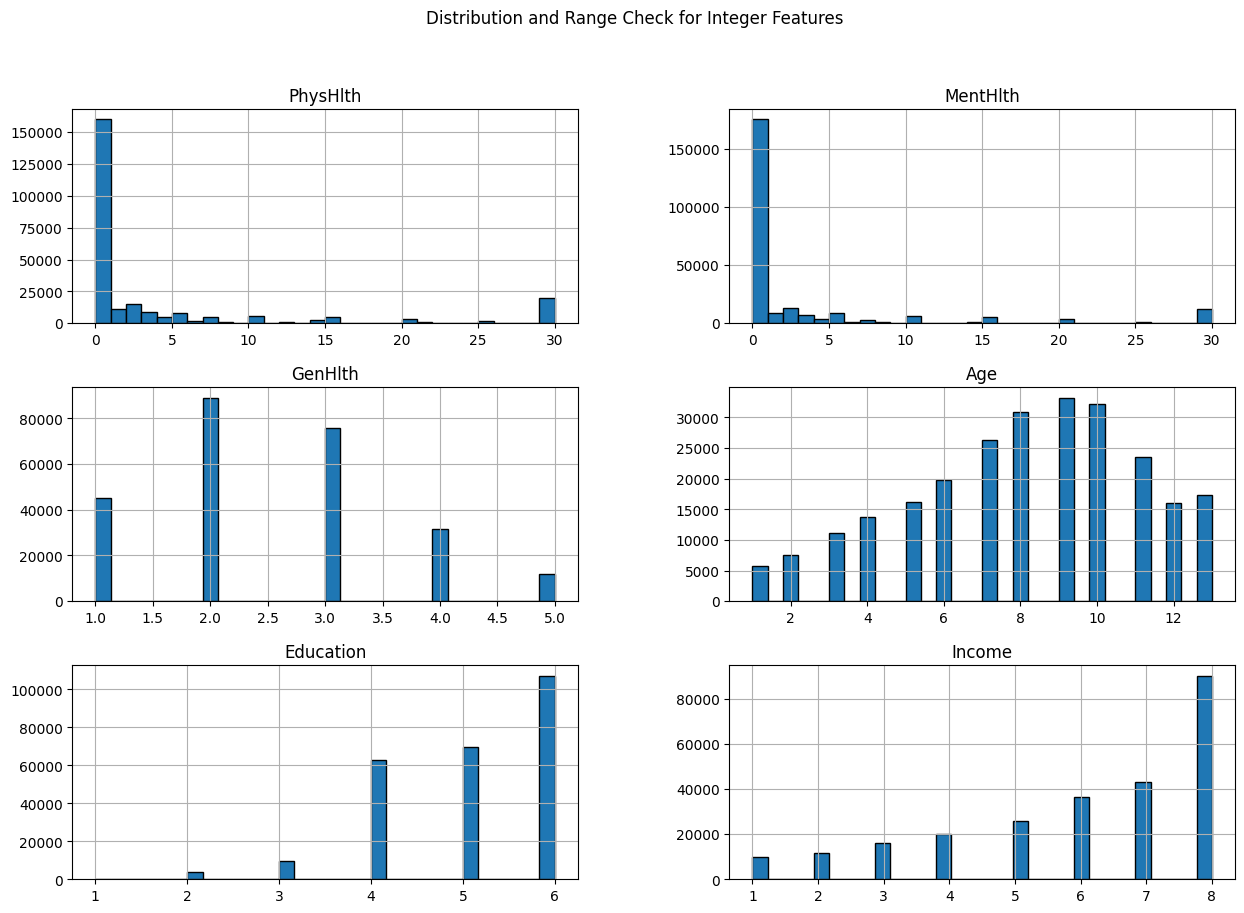

In [139]:
cols_to_check = ['PhysHlth', 'MentHlth', 'GenHlth', 'Age', 'Education', 'Income']
diabetes_dataframe[cols_to_check].hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle('Distribution and Range Check for Integer Features')
plt.show()

Upon graphing each of the integer columns (sans BMI), we can see that all the records are within the set bounds. There are also no obvious outliers. Most people in terms of health see themselves as very healthy, with a slight peak at 30, indicating some find themselves to be extremely unhealthy.

In terms of age, we also see that most people are within the middle age bracket of around 40-50 years old.

In terms of education, most people are actually those that studied in college, with very few having stopped at high school or below. The majority of the patients are also college graduates.

As for income, we can see that most patients have a relatively solid annual income, with the dataset being mostly people in the middle class.

With that completed, let us look into BMI, which aren't categorized yet. Let's plot a boxplot to see the interquartile range and those records that are way too far from Q3.

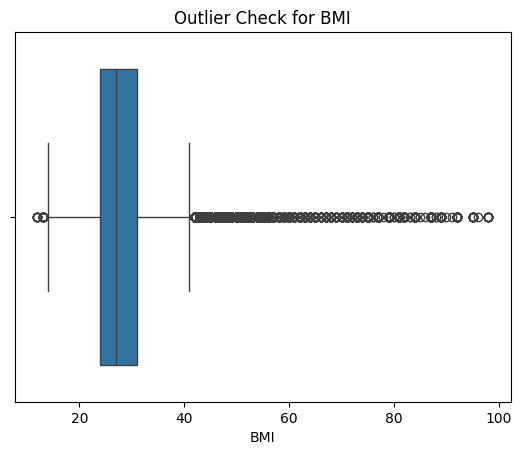

In [140]:
sns.boxplot(x=diabetes_dataframe['BMI'])
plt.title('Outlier Check for BMI')
plt.show()

In [141]:
Q1 = diabetes_dataframe['BMI'].quantile(0.25)
Q3 = diabetes_dataframe['BMI'].quantile(0.75)
IQR = Q3 - Q1

outliers = diabetes_dataframe[(diabetes_dataframe['BMI'] < (Q1 - 1.5 * IQR)) | (diabetes_dataframe['BMI'] > (Q3 + 1.5 * IQR))]
print(f"The 4th quartile starts at BMI: {Q3}")
print(f"Number of BMI outliers: {len(outliers)}")

The 4th quartile starts at BMI: 31.0
Number of BMI outliers: 9847


Upon checking the interquartile range, we can observe that there are 9847 outliers in the BMI column. To see this, let us check these columns.

In [142]:
upper_bound = Q3 + (1.5 * IQR)
print(f"Outliers begin at a BMI of: {upper_bound}")

diabetes_dataframe[diabetes_dataframe['BMI'] >= 41.05].head()

Outliers begin at a BMI of: 41.5


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
85,True,True,True,True,45,False,False,False,False,False,...,True,False,4,2,30,True,False,9,6,8
97,False,True,False,True,45,False,False,False,True,True,...,True,False,3,0,0,False,False,9,4,6
156,True,True,True,True,47,True,False,False,False,True,...,True,False,3,0,0,True,False,11,6,5
188,False,True,False,True,43,True,False,False,False,False,...,True,False,4,0,7,True,False,10,5,2
201,True,True,True,True,55,False,False,False,False,True,...,True,False,4,0,15,False,False,11,5,2


We can check the values that are considered outliers, as seen below:

In [143]:
bmi_outliers_df = diabetes_dataframe[diabetes_dataframe['BMI'] >= 41.05].copy()

bin_edges = list(range(41, 105, 5))

bmi_outliers_df['BMI_Group'] = pd.cut(bmi_outliers_df['BMI'], bins=bin_edges)

outlier_distribution = bmi_outliers_df['BMI_Group'].value_counts().sort_index()
print("Distribution of BMI Outliers:")
print(outlier_distribution)

Distribution of BMI Outliers:
BMI_Group
(41, 46]     5751
(46, 51]     2147
(51, 56]      843
(56, 61]      309
(61, 66]      133
(66, 71]      102
(71, 76]      132
(76, 81]      173
(81, 86]       85
(86, 91]       93
(91, 96]       45
(96, 101]       7
Name: count, dtype: int64


In [144]:
diabetes_dataframe[diabetes_dataframe['BMI'] >= 96].head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
36324,False,True,False,True,96,False,False,False,True,False,...,True,False,2,0,0,False,False,6,4,8
76370,False,False,True,False,98,True,False,False,True,False,...,True,False,2,10,0,False,False,3,4,6
76394,True,True,True,True,98,True,False,True,False,True,...,True,False,5,30,30,True,False,8,6,5
76396,True,True,True,True,98,True,True,True,False,True,...,True,False,4,15,10,True,False,11,5,6
76532,False,True,True,True,98,False,True,False,False,False,...,True,False,2,0,0,False,False,13,5,8


We are at a standstill. The issue here is that a BMI around 75+ is a bit of a problem, since it looks out of the ordinary and feels like it's only a special case.

We have approximately 500 records where the BMI is above 76. Upon checking, a BMI in that range is feasible, but extremely rare. What we can do is keep them for now as they do not go beyond the human limits

See: https://www.bbc.com/news/av/world-latin-america-42581917

### Feature Engineering



#### BMI Categorization

One of the most common ways BMI can be referred to is with their categorical classification:
- Underweight - Less than 18.5
- Healthy - 18.5 - 24.9
- Overweight - 25 - 29.9
- Obesity - 30+
  - Class 1 Obesity - 30 - 34.9
  - Class 2 Obesity - 35 - 39.9
  - Class 3 Obesity - 40+

For this, we will bin the BMI into a categorical column.

https://www.cdc.gov/bmi/adult-calculator/bmi-categories.html

In [145]:
bmi_bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')]

#bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Class 1 Obese', 'Class 2 Obese', 'Class 3 Obese']
bmi_labels = [1, 2, 3, 4, 5, 6]
diabetes_dataframe['BMI_Category'] = pd.cut(diabetes_dataframe['BMI'], bins=bmi_bins, labels=bmi_labels)
diabetes_dataframe['BMI_Category'].value_counts()

,count
BMI_Category,
3,93749
2,68953
4,53451
5,20663
6,13737
1,3127


#### Lifestyle Score

Next, we can try to combine and aggregate all the healthy habits, combining them into a single metric. For this, we can call it 'Healthy_Score'.

In [146]:
diabetes_dataframe['Healthy_Score'] = (
    diabetes_dataframe['PhysActivity'].astype(int) +
    diabetes_dataframe['Fruits'].astype(int) +
    diabetes_dataframe['Veggies'].astype(int) -
    diabetes_dataframe['Smoker'].astype(int) -
    diabetes_dataframe['HvyAlcoholConsump'].astype(int)
)

#### Health Distress

Lastly, I will try to combine both bad mental and physical health days to see total bad health days within the last month.

In [147]:
diabetes_dataframe['Total_Bad_Health_Days'] = diabetes_dataframe['MentHlth'] + diabetes_dataframe['PhysHlth']

### Initial Correlation Analysis

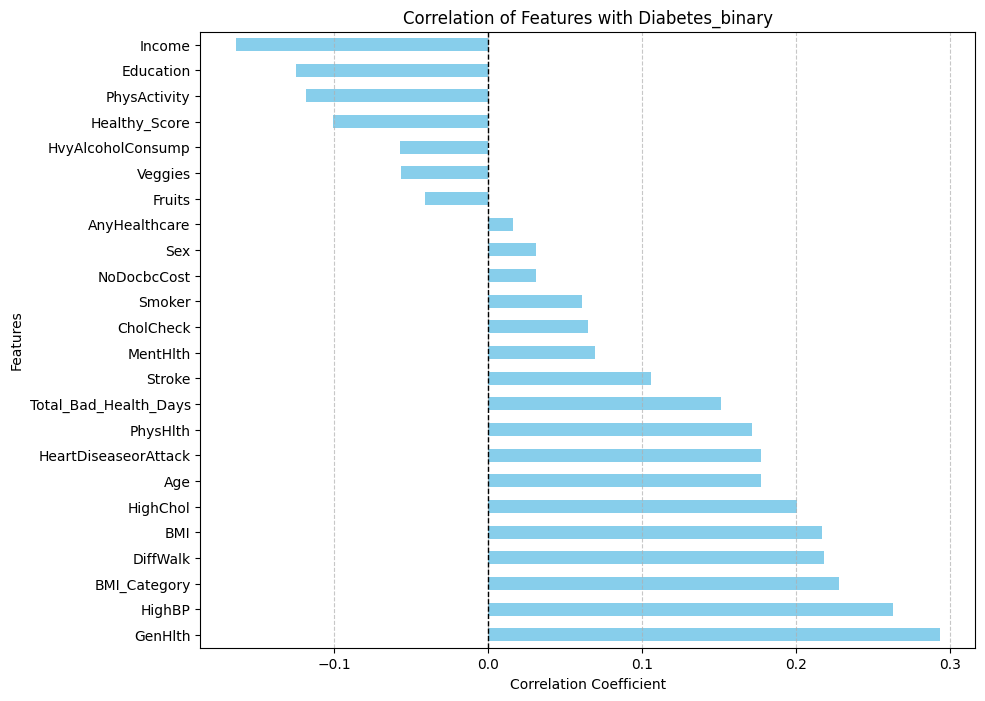

In [148]:
correlations = diabetes_dataframe.corr()['Diabetes_binary'].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
correlations.drop('Diabetes_binary').plot(kind='barh', color='skyblue')

plt.title('Correlation of Features with Diabetes_binary')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1) # Reference line at 0
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Upon creating a correlation graph, plotting the other fields with their correlation with Diabetes_binary, we can see that Income, Education, and PhysActivity have a relatively large negative correlation with the target variable.

Meanwhile, in the positive correlation side, GenHlth, HighBP, DiffWalk, BMI, HighChol, Age, HeartDiseaseOrAttack, and PhysHlth have a relative high correlation.

This means that those with a negative correlation have an inverse relation with the target variable, but those with a postiive correlation have a direct relation.

### Data preparation

#### Train-Test Split

Before we proceed with scaling or balancing, we must first split our data. This is to prevent having class balancing and feature scaling be affected by the test set.

In [149]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

bool_cols = diabetes_dataframe.select_dtypes(include=['boolean']).columns
diabetes_dataframe[bool_cols] = diabetes_dataframe[bool_cols].astype('int8')


X = diabetes_dataframe.drop('Diabetes_binary', axis=1)
y = diabetes_dataframe['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#### Handling Class Imbalance

In [150]:
diabetes_dataframe['Diabetes_binary'].value_counts()

,count
Diabetes_binary,
0,218334
1,35346


Upon checking the number of classes for those with diabetes and those without, we can see a huge class imbalance. Around 15% of the target variable are True, while the rest are False. This may result in a model that might lean towards predicting "No Diabetes" everytime.

In [151]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print(f"Original training shape: {y_train.value_counts()}")
print(f"Resampled training shape: {y_train_res.value_counts()}")

Original training shape: Diabetes_binary
0    174667
1     28277
Name: count, dtype: int64
Resampled training shape: Diabetes_binary
0    174667
1    174667
Name: count, dtype: int64


To handle this class balance, one of the most popular technique is to use Synthetic Minority Over-sampling Technique (SMOTE).

This generates synthetic data based on the minority class, for this case, the True class, by interpolating samples around the minor category.

This lets us create the same number of samples for both classes.


In [152]:
bmi_bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')]

#bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Class 1 Obese', 'Class 2 Obese', 'Class 3 Obese']
bmi_labels = [1, 2, 3, 4, 5, 6]
diabetes_dataframe['BMI_Category'] = pd.cut(diabetes_dataframe['BMI'], bins=bmi_bins, labels=bmi_labels)
diabetes_dataframe['BMI_Category'].value_counts()

,count
BMI_Category,
3,93749
2,68953
4,53451
5,20663
6,13737
1,3127


This is to apply the BMI_Category for the new synthetic data.

#### Feature Scaling

Since most of our variables are boolean, there are some that are numerical/integer, which may lead to biases when it comes to correlation.

To fix this issue, we can use feature scaling to put values between 0 and 1 to ensure no biases.

In [153]:
from sklearn.preprocessing import MinMaxScaler
scale_cols = ['PhysHlth', 'MentHlth', 'GenHlth', 'Age', 'Education', 'Income', 'BMI', 'Healthy_Score']

scaler = MinMaxScaler()
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])

print(X_train[scale_cols].describe().loc[['min', 'max']])

     PhysHlth  MentHlth  GenHlth  Age  Education  Income  BMI  Healthy_Score
min       0.0       0.0      0.0  0.0        0.0     0.0  0.0            0.0
max       1.0       1.0      1.0  1.0        1.0     1.0  1.0            1.0


## Data Prediction Model

We have now done our cleaning and initial analysis, as well as made new features and scaled our data.

The next step will be to create a machine learning model that can predict if a patient has diabetes or not.

### Baseline Model

To begin, let us first use a simple ML model, first, Logistic Regression, and Random Forest Classifier. Both are simple classification models and will be used as a benchmark.


In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, recall_score

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_res, y_train_res)
y_pred_lr = lr_model.predict(X_test)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_res, y_train_res)
y_pred_rf = rf_model.predict(X_test)

print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.89      0.51      0.65     43667
           1       0.17      0.63      0.27      7069

    accuracy                           0.52     50736
   macro avg       0.53      0.57      0.46     50736
weighted avg       0.79      0.52      0.59     50736

Random Forest Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92     43667
           1       0.36      0.02      0.04      7069

    accuracy                           0.86     50736
   macro avg       0.61      0.51      0.48     50736
weighted avg       0.79      0.86      0.80     50736



As seen above, we can see that the Logistic Regression handles 63% of actual diabetes cases through the recall, however, it has a very low precision of 17%. When it predicts diabetes, it is only right 17% of the time.

This can be due to the use of SMOTE, creating a lot of records with diabetes but is very vulnerable to make mistakes.

As for the Random Forest, we have a somewhat opposite story. The recall shows 2%, indicating that it only catches 2% of diabetic patients. There is also an accuracy of 86%, but this is contradictory since most of our data are made up of non-diabetic patients, so guessing False for the target variable would naturally be mostly correct.

Despite our use of SMOTE, the model is overfitting to the non-diabetic class or is struggling with the use of synthetic noise.

### Main Model (XGBoost)

We will now be continuing with the use of XGBoost, which is an ML model that uses Gradient Boosting. It handles non-linearity well, it's good for analyzing bias and variance, and usually used in basic medical predictive tasks.

In [158]:
if str(X_train_res['BMI_Category'].dtype) == 'category':
    X_train_res['BMI_Category'] = X_train_res['BMI_Category'].cat.codes
    X_test['BMI_Category'] = X_test['BMI_Category'].cat.codes

In [159]:
from xgboost import XGBClassifier

ratio = float(y_train.value_counts()[0] / y_train.value_counts()[1])

xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    scale_pos_weight=ratio,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train_res, y_train_res)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Report:\n", classification_report(y_test, y_pred_xgb))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:200: UserWarning: [06:52:32] WARNING: /__w/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84     43667
           1       0.17      0.24      0.19      7069

    accuracy                           0.73     50736
   macro avg       0.52      0.52      0.52     50736
weighted avg       0.77      0.73      0.75     50736



The new results tell a similar story. It's is an improvement from the Random Forest, with a lower accuracy but can better predict cases of diabetes.

As a test, let us run a Randomized Search to tune the f1 score, making precision and recall more balanced.

In [160]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'subsample': [0.7, 0.8, 0.9]
}

random_search = RandomizedSearchCV(
    XGBClassifier(eval_metric='logloss', random_state=42),
    param_distributions=param_grid,
    n_iter=10,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1
)

random_search.fit(X_train_res, y_train_res)
best_xgb = random_search.best_estimator_

y_pred_opt = best_xgb.predict(X_test)
print("Optimized XGBoost Report:\n", classification_report(y_test, y_pred_opt))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Optimized XGBoost Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90     43667
           1       0.25      0.15      0.18      7069

    accuracy                           0.82     50736
   macro avg       0.56      0.54      0.54     50736
weighted avg       0.78      0.82      0.80     50736



It seems that the Randomized Search did help a bit, but it's still not pretty good in predicting cases of diabetes.

To simply perform a sanity check, the next thing I'll do is use the original training and testing data.

In [163]:
if str(X_train['BMI_Category'].dtype) == 'category':
    X_train['BMI_Category'] = X_train['BMI_Category'].cat.codes


In [164]:
ratio = float(y_train.value_counts()[0] / y_train.value_counts()[1])

weighted_xgb = XGBClassifier(
    n_estimators=250,
    learning_rate=0.05,
    max_depth=6,
    scale_pos_weight=ratio,
    eval_metric='logloss',
    random_state=42
)

weighted_xgb.fit(X_train, y_train)
y_pred_weighted = weighted_xgb.predict(X_test)

print("Weighted XGBoost (No SMOTE) Report:\n", classification_report(y_test, y_pred_weighted))

Weighted XGBoost (No SMOTE) Report:
               precision    recall  f1-score   support

           0       0.95      0.71      0.82     43667
           1       0.31      0.79      0.44      7069

    accuracy                           0.72     50736
   macro avg       0.63      0.75      0.63     50736
weighted avg       0.86      0.72      0.77     50736



We now have something that is better than the previous models. Turns out, not using SMOTE was more effective.

We achieved a recall of 79%, meaning it almost catches 80% of diabetic cases. Though, a 31% precision may be more desirable.

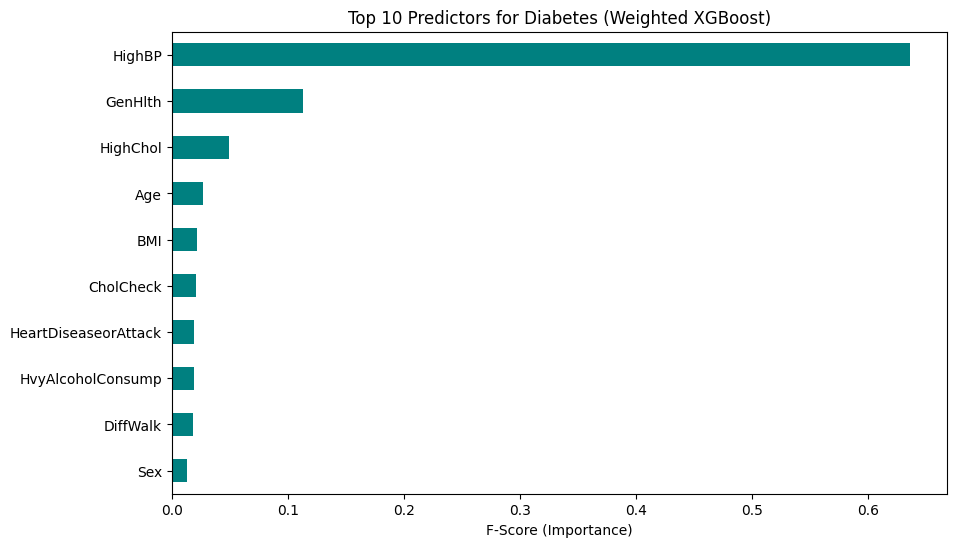

In [166]:
importances = weighted_xgb.feature_importances_
feature_names = X.columns
feat_importances = pd.Series(importances, index=feature_names)

plt.figure(figsize=(10,6))
feat_importances.nlargest(10).sort_values().plot(kind='barh', color='teal')
plt.title('Top 10 Predictors for Diabetes (Weighted XGBoost)')
plt.xlabel('F-Score (Importance)')
plt.show()

Upon checking, we see that HighBP, GenHlth, and HighChol are the leading three fields, with Age and BMI following use.
- HighBP & HighChol: These usually dominate. They are the strongest physiological indicators.
- GenHlth: Patient self-perception is a surprisingly powerful predictor.
- BMI: Important but not a smoking gun factor.
- Age: Diabetes risk scales heavily with a patients' age.

### Model Optimization

Now that we have completed creating our model, we can try one last optimization before we can finish.

In this setup, we will run an optuna optimizer to determine the best parameters for the XGBoost model, but only running through 20 trials as to preserve memory.

In [168]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, recall_score, precision_score

def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 9),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, log=True),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'scale_pos_weight': ratio
    }

    model = XGBClassifier(**param, eval_metric='logloss', random_state=42)

    score = cross_val_score(model, X_train, y_train, cv=3, scoring='f1').mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

print("Best Parameters:", study.best_params)

[I 2026-02-24 07:12:16,114] A new study created in memory with name: no-name-f5ee493e-2df5-473b-af84-602bfab8b4ce
[I 2026-02-24 07:12:54,281] Trial 0 finished with value: 0.4482610698088396 and parameters: {'n_estimators': 119, 'max_depth': 9, 'learning_rate': 0.015506122541211887, 'subsample': 0.6006090987588006, 'colsample_bytree': 0.7535162149767414, 'gamma': 3.7208337726112384, 'min_child_weight': 2}. Best is trial 0 with value: 0.4482610698088396.
[I 2026-02-24 07:13:05,181] Trial 1 finished with value: 0.44420544385812155 and parameters: {'n_estimators': 141, 'max_depth': 7, 'learning_rate': 0.030900447584382342, 'subsample': 0.9156942437133933, 'colsample_bytree': 0.8260988784707297, 'gamma': 3.72436024687845, 'min_child_weight': 2}. Best is trial 0 with value: 0.4482610698088396.
[I 2026-02-24 07:13:27,810] Trial 2 finished with value: 0.4444168516190891 and parameters: {'n_estimators': 429, 'max_depth': 5, 'learning_rate': 0.03223774881375672, 'subsample': 0.622526277027248, '

Best Parameters: {'n_estimators': 228, 'max_depth': 9, 'learning_rate': 0.01395563069181798, 'subsample': 0.7629702963858808, 'colsample_bytree': 0.7567284686709179, 'gamma': 1.4740862967937154, 'min_child_weight': 1}


Next, let us apply the determined best parameters.

In [169]:
ratio = float(y_train.value_counts()[0] / y_train.value_counts()[1])

weighted_xgb = XGBClassifier(
    n_estimators=228,
    learning_rate=0.01395563069181798,
    max_depth=9,
    subsample=0.7629702963858808,
    colsample_bytree=0.7567284686709179,
    gamma=1.4740862967937154,
    min_child_weight=1,
    scale_pos_weight=ratio,
    eval_metric='logloss',
    random_state=42
)

weighted_xgb.fit(X_train, y_train)
y_pred_weighted = weighted_xgb.predict(X_test)

print("Weighted XGBoost (No SMOTE) Report:\n", classification_report(y_test, y_pred_weighted))

Weighted XGBoost (No SMOTE) Report:
               precision    recall  f1-score   support

           0       0.95      0.73      0.82     43667
           1       0.31      0.77      0.45      7069

    accuracy                           0.73     50736
   macro avg       0.63      0.75      0.63     50736
weighted avg       0.86      0.73      0.77     50736



We have a slight improvement in terms of accuracy and f1-score for identifying diabetic cases, but a slight dip and improvement in the recall of diabetic and non-diabetic classification.

We can conclude the model evaluation here.

## Interpretation

The modeling phase revealed that a cost-sensitive learning approach is significantly better than using synthetic data for this dataset.

The Weighted XGBoost set a relatively high baseline, with a Recall of 0.79, meaning it successfully identifies 79% of individuals with diabetes in a test set, but is only precise for 31% of those cases.

Based on XGBoost’s feature importance, the following variables were the primary drivers of the classification:
- High Blood Pressure & High Cholesterol: These remained the strongest physiological indicators.
- General Health (GenHlth): Patient self-perception was a top-tier predictor.
- BMI & Age: These were secondary to the direct metabolic markers above.
- Healthy_Score: This indicates that the combination of lifestyle factors (smoking, diet, alcohol) provides predictive value beyond single variables.


## Recommendation

For future iterations on this dataset, use scale_pos_weight or class weights rather than SMOTE to maintain the integrity of patient profiles.

To ensure that the output considers real-wold risks, future projects may apply Platt Scaling or Isotonic Regression to the final XGBoost model.